# Actividad 3 de Evaluación de la segmentación de la asignatura de Percepción Computacional

Los integrantes del grupo que han participado en esta actividad son:

    1. Enrique Barreneche Ivorra
    2. Antonio Escacena Marchena
    3. Andrés Sánchez Sánchez
    4. Eduardo Sanz Valdeolivas

In [1]:
#Se importan las librerías necesarias para segmentar la imágen elegida
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
from skimage import io

(-0.5, 1199.5, 899.5, -0.5)

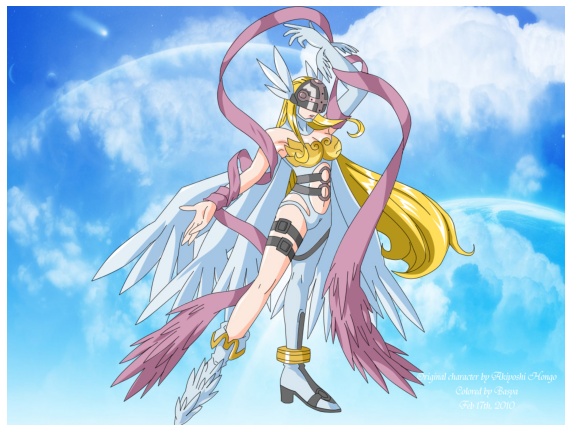

In [2]:
#Se carga la imagen de un dibujo con la librería de cv2
im = cv.imread('a.jpg')
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
plt.axis('off')

A través de varias funciones y la librería cv se seleccionará el pixel del color que se pretende segmentar. Se tratará de segmentar el lazo rosa que está alrededor del ángel primeramente

In [3]:
# Función mostrar en pantalla las coordenadas del pixel seleccionado
def matriz_imagen(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(im_c,(x,y),50,(0,0,0),2)
        print(f'x={x} e y={y}')

In [4]:
def gess_coordenadas(im_c):
    #Relacción de proporcionalidad para que la ventana emergente de cv 
    #se tenga unas porporciones que se adapten a la pantalla del ordenador de las variables fx y fy
    fx=0.8
    fy=0.8
    cv.namedWindow('Imagen')
    cv.setMouseCallback('Imagen',matriz_imagen)
    #La librería de cv2 trabajan con los canales BGR por tanto hay que cambiarlo a RGB
    im_c=cv.imread(filname,cv.COLOR_BGR2RGB)
    while True:
        #im_c = cv.resize(im_c,(640,640))
        newImg = cv.resize(im_c, (0,0), fx=fx, fy=fy)
        cv.imshow('Imagen',newImg)

        k=cv.waitKey(1) & 0xFF
        if k==27: #Si pulsamos esc se cierra la imagen
            cv.destroyAllWindows()
            break
            
#Función de lectura de la imagen para selecionar el pixel
def imagen(filname):
    im_c=io.imread(filname)
    return im_c

In [5]:
filname='a.jpg'
im_c=imagen(filname)
gess_coordenadas(im_c)

x=606 e y=405


Cuando buscas las coordenadas de la imagen, aparece la foto y si pinchas click con el botón izquierdo del ratón, entonces te muestra la coordenada x y la coordenada y en pantalla. 
Pulsando la tecla "*esc*" se podrá salir de la ventana de la librería de open cv.
En la siguente imagen, se ve como se mostraría destacando la coordenada y donde aparece la coordenada ![Ventana de Open CV](I1.PNG)

Con estas coordenadas se puede sacar una muestra del color que será segmentado en los canáles HSV

In [6]:
def muestra(x,y,fx,fy,im):
    #Hay que tener en cuenta los coeficientes de fx y fy porque las coordenadas obtenidas son de una imágen igual 
    #pero reducida en esa proporción y por tanto hay que buscar las coordenadas reales
    if im.shape[1]<round(x/fx):
        #el objetivo es que no se salga de los límites de la imagen original con un redondeo
        a1=im.shape[1]-1
    else:
        a1=round(x/fx)
    if im.shape[0]<round(y/fy):
        a2=im.shape[0]-1
    else:
        a2=round(y/fy)
    #Se sacan lo valores del canal RGB con esas coordenadas de la imagen real
    v=im[a2,a1]
    print(v)
    #Se crea una imágen con esos valores de RGB de 640x640
    R=np.ones((640, 640))*v[0]
    G=np.ones((640, 640))*v[1]
    B=np.ones((640, 640))*v[2]
    total=[R,G,B]
    #Se convinan los tres canales
    total=np.stack(total,axis=2)
    total=total.astype('uint8')
    
    plt.figure(figsize=(2,2))
    plt.axis("off")
    plt.imshow(total)
    #devuelve las coordenadas de la imagen original sin aplicar escala
    return a1, a2

[183 157 211]


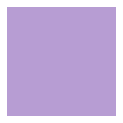

In [7]:
#Aplicamos la función con los datos de coordenadas escalados al 0.8 tanto en x como en y y se obtiene un valor púrpura-lila
xR, yR = muestra(606,405,0.8,0.8,im)

Como se mencionó en clase, la manera más eficaz de segmentar colores no es actuar sobre los canales de RGB, si no en formato HSV (del inglés Hue, Saturation, Value – Matiz, Saturación, Valor).
Se sabe que el rango de valores de H está [0-360] y S y V en [0-255] y se puede apreciar en el cono de HSV ![Ventana de Open CV](Cono_de_la_coloración_HSV.png)

In [8]:
pixel_convert = rgb2hsv(im[yR,xR])
#La H se pone en una escala de máximo 360
#S y V se ponen en una escala de máximo 255
p_hsv=[round(pixel_convert[0]*360),round(pixel_convert[1]*255),round(pixel_convert[2]*255)]
p_hsv

[269, 65, 211]

Con la información de la variable *p_hsv* se crea un código que actuará de manera interactiva y se le introducirán los valores de *p_hsv* con un rango para que se pueda operar de manera interactiva.

Como principal problema está que el ser humano debe decidir el rango dependiendo de los resultados

Se podrá ver como funciona en la imágen de debajo del código

In [9]:
def nothing(x):
    pass

cv.namedWindow("Trackbars")
#Mediante barras se determina cual será el humbral de manera interactiva
#Los valores máximos
max_H=360
max_S=255
max_V=255
#Son los valores mínimos controlando que estas variables no se salgan de los límites en su valor mínimo del rango
min_H=p_hsv[0]+40
if min_H>360:
    min_H=360
min_S=p_hsv[1]+40
if min_S>100:
    min_S=255
min_V=p_hsv[2]+40
if min_V>100:
    min_V=255

#Se crean las barras para modular
cv.createTrackbar("L-H","Trackbars",0,min_H,nothing)
cv.createTrackbar("L-S","Trackbars",0,min_S,nothing)
cv.createTrackbar("L-V","Trackbars",0,min_V,nothing)
cv.createTrackbar("U-H","Trackbars",max_H,max_H,nothing)
cv.createTrackbar("U-S","Trackbars",max_S,max_S,nothing)
cv.createTrackbar("U-V","Trackbars",max_V,max_V,nothing)

#Con un while se vuelve interactivo y se actualiza el resultado hasta pulsar la tecla esc
#Después se mostrarán los humbrales
while True:
    hsv = cv.cvtColor(im.copy(), cv.COLOR_RGB2HSV)
    
    l_h= cv.getTrackbarPos("L-H","Trackbars")
    l_s= cv.getTrackbarPos("L-S","Trackbars")
    l_v= cv.getTrackbarPos("L-V","Trackbars")
    u_h= cv.getTrackbarPos("U-H","Trackbars")
    u_s= cv.getTrackbarPos("U-S","Trackbars")
    u_v= cv.getTrackbarPos("U-V","Trackbars")
    
    lower = np.array([l_h,l_s,l_v])
    upper = np.array([u_h,u_s,u_v])
    mask=cv.inRange(hsv,lower,upper)
    result=cv.bitwise_and(im,im,mask=mask)
    #Se reduce un 45% la escala de la imagen para mostrar los efectos que ocurren
    fx=0.45
    fy=0.45
    newImg = cv.resize(im, (0,0), fx=fx, fy=fy)
    
    newMask = cv.resize(mask, (0,0), fx=fx, fy=fy)
    
    newresult = cv.resize(result, (0,0), fx=fx, fy=fy)
    
    cv.imshow("mask",newMask)
    cv.imshow("frame",newImg)
    cv.imshow("result",newresult)
    
    key=cv.waitKey(1)
    if key==27:
        print(l_h,l_s,l_v,u_h,u_s,u_v)
        print(lower)
        print(upper)
        break

cv.destroyAllWindows()

126 61 158 360 255 255
[126  61 158]
[360 255 255]


Cuando el usuario decide el humbral, tal y como se puede ver, te devuelve los humbrales mínimos y máximos para crear la máscara.

A continuación se ve en tres imágenes el proceso que se sigue desde el inicio al final.

(-0.5, 1789.5, 1001.5, -0.5)

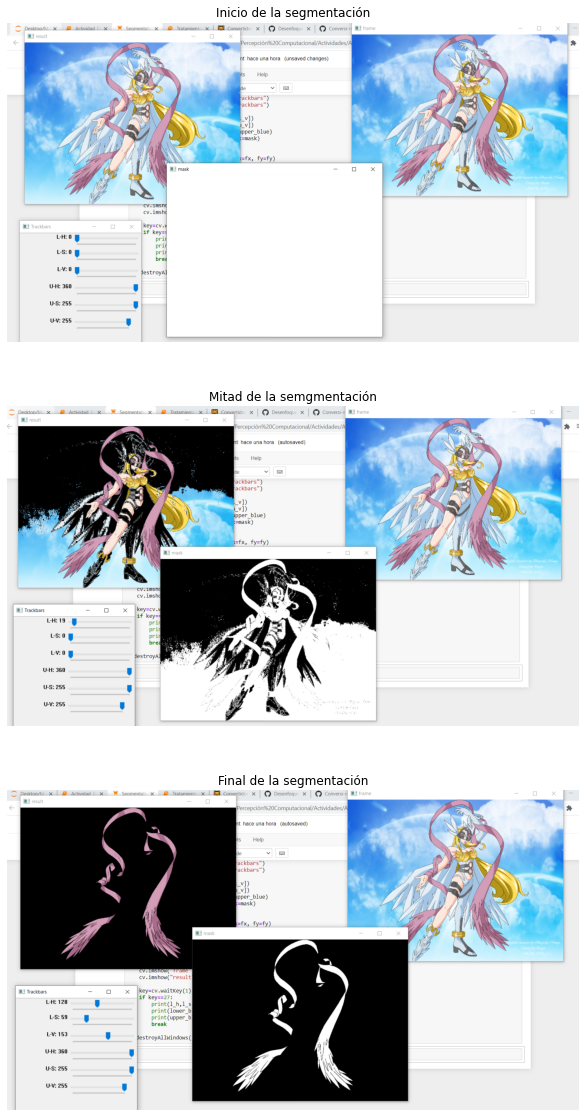

In [10]:
#Se mostrará la imagen de lo que hizo el código anterior en tres fases
fig, (ax1,ax2,ax3)=plt.subplots(ncols=1,nrows=3,figsize=(20,20),sharex=True,sharey=True)
ax1.imshow(plt.imread('I2.PNG'))
ax2.imshow(plt.imread('I3.PNG'))
ax3.imshow(plt.imread('I4.PNG'))

ax1.set_adjustable(adjustable='box')
ax2.set_adjustable(adjustable='box')
ax3.set_adjustable(adjustable='box')

ax1.set_title('Inicio de la segmentación')
ax1.axis('off')
ax2.set_title('Mitad de la semgmentación')
ax2.axis('off')
ax3.set_title('Final de la segmentación')
ax3.axis('off')

(-0.5, 1199.5, 899.5, -0.5)

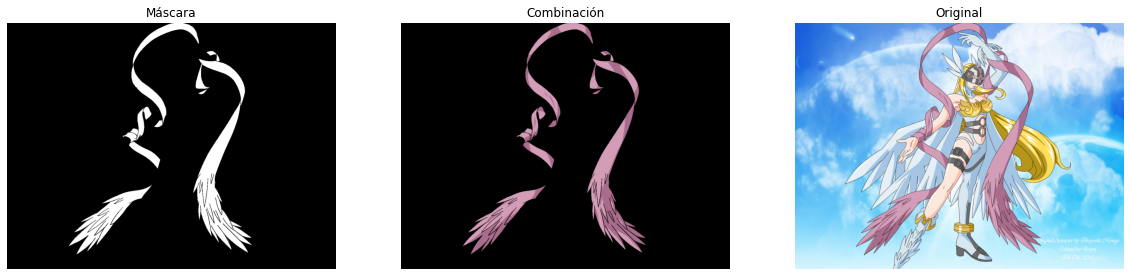

In [11]:
#Sacamos la máscara con los valores de humbralización
mask=cv.inRange(hsv,lower,upper)

#Se conbina la imagen orignial con la máscara para ver la segmentación aislada
result=cv.bitwise_and(im,im,mask=mask)


fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(20,20),sharex=True,sharey=True)
ax1.imshow(mask,cmap='gray')
ax2.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))
ax3.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))

ax1.set_adjustable(adjustable='box')
ax2.set_adjustable(adjustable='box')
ax3.set_adjustable(adjustable='box')

ax1.set_title('Máscara')
ax1.axis('off')
ax2.set_title('Combinación')
ax2.axis('off')
ax3.set_title('Original')
ax3.axis('off')

Conociendo los valores de segmentación, se tratará de convertir ese lila en una banda de color rojizo, azulado y verdoso manteniendo las proporciones ya que sabemos que los colores tienen esta disposición:
    
    Rojo:
        H=0
        S=255
        V=255
    Verde:
        H=120
        S=255
        V=255
    Azul:
        H=240
        S=255
        V=255
    Purpura:
        H=269
        S=65
        V=211

Con esta información haremos tender a estos tres colores aproximadamente para mantener en la medida de lo posible la proporción
    

In [12]:
#Se coge la máscara en los colores HSV
mask_combine=cv.cvtColor(result,cv.COLOR_RGB2HSV)

#Se separan los siguientes canales
R1H=mask_combine[:,:,0]
R2S=mask_combine[:,:,1]
R3V=mask_combine[:,:,2]

In [13]:
#Para conseguir el color Rojo el canal H debe ser próximo a 0 y tenemos H=269
for i in range(0,R1H.shape[0]):
    for j in range(0,R1H.shape[1]):
        if  R1H[i,j]>0:
            #todos los valores superiores a cero se resta un rango de 260 para aproximarlo a cero
            R1H[i,j]-260
#Si hay algún valor inferior a 0 se leasigna 0            
R1H[R1H<0]=0
R1H=R1H.astype('uint8')

In [14]:
#Para conseguir el color Rojo el canal S debe ser próximo a 255 y tenemos S=65
for i in range(0,R2S.shape[0]):
    for j in range(0,R2S.shape[1]):
        if  R2S[i,j]>0:
            #todos los valores superiores a cero se suma un rango de 180 para aproximarlo a 255
            R2S[i,j]+180
#Si hay algún valor inferior a 0 se leasigna 0            
R2S[R2S>255]=255
R2S=R2S.astype('uint8')

In [15]:
#Para conseguir el color Rojo el canal V debe ser próximo a 255 y tenemos V=211
for i in range(0,R3V.shape[0]):
    for j in range(0,R3V.shape[1]):
        if  R3V[i,j]>0:
            #todos los valores superiores a cero se suma un rango de 38 para aproximarlo a 255
            R3V[i,j]+38
#Si hay algún valor inferior a 0 se leasigna 0            
R3V[R3V>255]=255
R3V=R3V.astype('uint8')

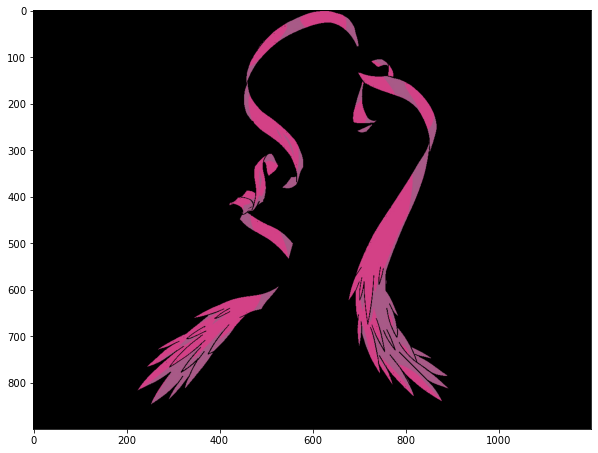

In [16]:
combine=[R1H,R2S,R3V]
combine=np.stack(combine,axis=2)
combine=combine.astype('uint8')
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(combine, cv.COLOR_BGR2RGB))

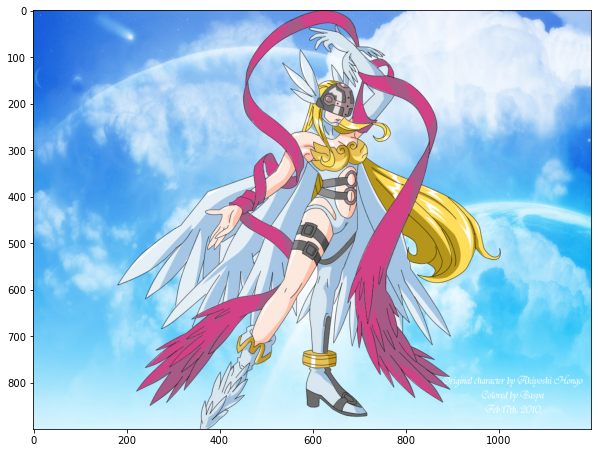

In [17]:
#Hacemos la máscara negativa
negative=cv.bitwise_not(mask)
#Se le añade la imagen original la máscara negativa
addition=cv.bitwise_and(im,im,mask=negative)
#Se le suma la imagen rojiza a la original
fin=cv.add(addition,combine)
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(fin, cv.COLOR_BGR2RGB))

A continuación se puede ver como el lazo cambia de color a un tono más rosa, esto se debe a que el rojo está proximo al rosa

(-0.5, 1199.5, 899.5, -0.5)

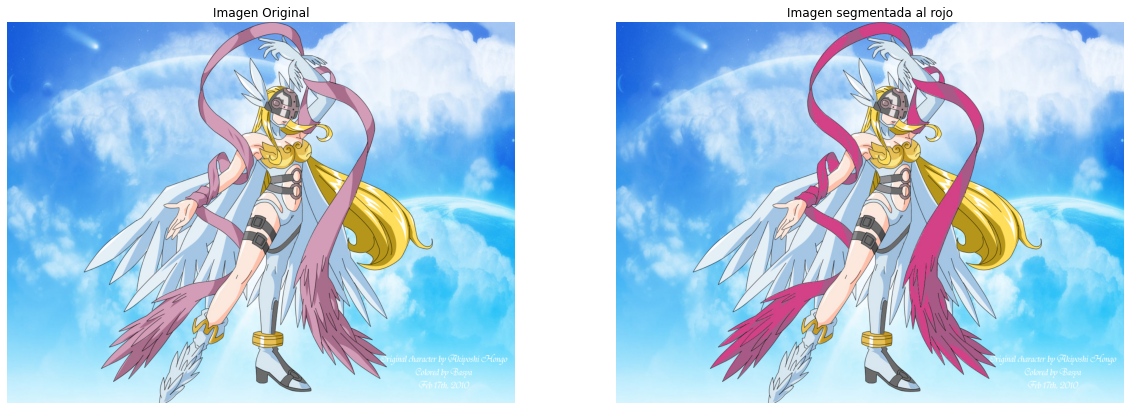

In [18]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(20,20),sharex=True,sharey=True)
ax1.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax2.imshow(cv.cvtColor(fin, cv.COLOR_BGR2RGB))

ax1.set_adjustable(adjustable='box')
ax2.set_adjustable(adjustable='box')

ax1.set_title('Imagen Original')
ax1.axis('off')
ax2.set_title('Imagen segmentada al rojo')
ax2.axis('off')

También se podría hacer para segmentar el color amarillo del cabello y partes de la vestimenta y será mostrada de manera rápida a continiación

In [19]:
filname='a.jpg'
im_c=imagen(filname)
gess_coordenadas(im_c)

x=717 e y=360


[255 222  91]


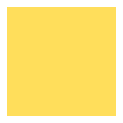

In [20]:
xR, yR = muestra(717,360,0.8,0.8,im_c)

In [21]:
pixel_convert = rgb2hsv(im[yR,xR])
#La H se pone en una escala de máximo 360
#S y V se ponen en una escala de máximo 255
p_hsv=[round(pixel_convert[0]*360),round(pixel_convert[1]*255),round(pixel_convert[2]*255)]
p_hsv

[192, 164, 255]

In [22]:
#Hay que repetir el código, porque dentro de una función da un error

cv.namedWindow("Trackbars")
#Mediante barras se determina cual será el humbral de manera interactiva
#Los valores máximos
max_H=360
max_S=255
max_V=255
#Son los valores mínimos controlando que estas variables no se salgan de los límites en su valor mínimo del rango
min_H=p_hsv[0]+40
if min_H>360:
    min_H=360
min_S=p_hsv[1]+40
if min_S>100:
    min_S=255
min_V=p_hsv[2]+40
if min_V>100:
    min_V=255

#Se crean las barras para modular
cv.createTrackbar("L-H","Trackbars",0,min_H,nothing)
cv.createTrackbar("L-S","Trackbars",0,min_S,nothing)
cv.createTrackbar("L-V","Trackbars",0,min_V,nothing)
cv.createTrackbar("U-H","Trackbars",max_H,max_H,nothing)
cv.createTrackbar("U-S","Trackbars",max_S,max_S,nothing)
cv.createTrackbar("U-V","Trackbars",max_V,max_V,nothing)

#Con un while se vuelve interactivo y se actualiza el resultado hasta pulsar la tecla esc
#Después se mostrarán los humbrales
while True:
    hsv = cv.cvtColor(im.copy(), cv.COLOR_RGB2HSV)
    
    l_h= cv.getTrackbarPos("L-H","Trackbars")
    l_s= cv.getTrackbarPos("L-S","Trackbars")
    l_v= cv.getTrackbarPos("L-V","Trackbars")
    u_h= cv.getTrackbarPos("U-H","Trackbars")
    u_s= cv.getTrackbarPos("U-S","Trackbars")
    u_v= cv.getTrackbarPos("U-V","Trackbars")
    
    lower = np.array([l_h,l_s,l_v])
    upper = np.array([u_h,u_s,u_v])
    mask=cv.inRange(hsv,lower,upper)
    result=cv.bitwise_and(im,im,mask=mask)
    #Se reduce un 45% la escala de la imagen para mostrar los efectos que ocurren
    fx=0.45
    fy=0.45
    newImg = cv.resize(im, (0,0), fx=fx, fy=fy)
    
    newMask = cv.resize(mask, (0,0), fx=fx, fy=fy)
    
    newresult = cv.resize(result, (0,0), fx=fx, fy=fy)
    
    cv.imshow("mask",newMask)
    cv.imshow("frame",newImg)
    cv.imshow("result",newresult)
    
    key=cv.waitKey(1)
    if key==27:
        print(l_h,l_s,l_v,u_h,u_s,u_v)
        print(lower)
        print(upper)
        break

cv.destroyAllWindows()

63 128 168 360 255 255
[ 63 128 168]
[360 255 255]


(-0.5, 1199.5, 899.5, -0.5)

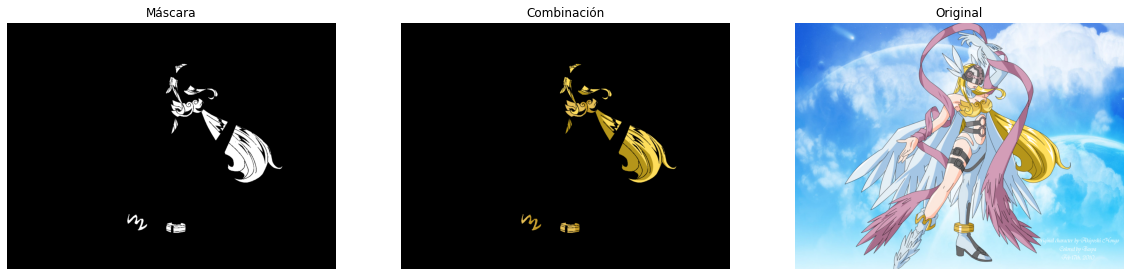

In [23]:
#Sacamos la máscara con los valores de humbralización
mask=cv.inRange(hsv,lower,upper)

#Se conbina la imagen orignial con la máscara para ver la segmentación aislada
result=cv.bitwise_and(im,im,mask=mask)


fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(20,20),sharex=True,sharey=True)
ax1.imshow(mask,cmap='gray')
ax2.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))
ax3.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))

ax1.set_adjustable(adjustable='box')
ax2.set_adjustable(adjustable='box')
ax3.set_adjustable(adjustable='box')

ax1.set_title('Máscara')
ax1.axis('off')
ax2.set_title('Combinación')
ax2.axis('off')
ax3.set_title('Original')
ax3.axis('off')